In [6]:
#imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.formula.api as smf 

In [7]:
#necessary functions from the pdutils.py
def readjoin(dn,fn,**kwargs):
    ffn = os.path.join(dn,fn)
    if not os.path.isfile(ffn):
        print("%s does not exist" % ffn)
    return pd.read_csv(ffn,**kwargs)

def readjoin_ts(dn,fn):
    return to_ts_std(readjoin(dn,fn))

def to_ts_std(df):
    return to_ts(df,'%Y-%m-%d %H:%M:%S')

def to_ts(df,fmt):
    import pandas as pd
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'],format=fmt,errors='coerce')
    return df

# Getting all the timestamps into one dataframe

In [8]:
path = "Traceroute Data"
dirs = os.listdir(path)
main_df = pd.DataFrame(columns= ['SRC', 'DEST', 'TIMESTAMP', 'NUM_HOPS'])
for file in dirs:
    if file.endswith(".csv"):
        if file.startswith("traceroute"):
            file_path = os.path.join(path, file)
            df = to_ts(readjoin(path,file),fmt = '%Y-%m-%d %H:%M:%S.%f')
            rows = (len(df.axes[0]) - 1)
            #print(rows)
            src = df.loc[2, 'IFC']
            dest = df.loc[2, 'DEST']
            timestamp = df.loc[2, 'TIMESTAMP']
            #print(df.loc[len(df.axes[0])-1, 'IP'])
            #print(df.loc[0, 'DEST'])
            if df.loc[len(df.axes[0])-1, 'IP'] == df.loc[0, 'DEST']:
                main_df.loc[len(main_df.index)] = [src, dest, timestamp, rows]
                #print("adding to main_df")
            print(file)
main_df.reset_index(drop=True, inplace=True)

traceroute-2024-03-22-12-54-36-317797-128.2.208.222-enx0016083656d3.csv
traceroute-2024-03-22-12-55-13-144612-52.70.44.155-enx0016083656d3.csv
traceroute-2024-03-22-12-55-29-891682-128.2.208.222-eth1.csv
traceroute-2024-03-22-12-56-02-028338-52.70.44.155-eth1.csv
traceroute-2024-03-22-12-56-36-061612-128.2.208.222-enx0016083656d3.csv
traceroute-2024-03-22-12-57-11-911358-52.70.44.155-enx0016083656d3.csv
traceroute-2024-03-22-12-57-29-101690-128.2.208.222-eth1.csv
traceroute-2024-03-22-12-58-01-197132-52.70.44.155-eth1.csv
traceroute-2024-03-22-13-23-34-224165-128.2.208.222-enx0016083656d3.csv
traceroute-2024-03-22-13-24-10-530142-52.70.44.155-enx0016083656d3.csv
traceroute-2024-03-22-13-24-27-556187-128.2.208.222-eth1.csv
traceroute-2024-03-22-13-25-00-024450-52.70.44.155-eth1.csv
traceroute-2024-03-22-13-28-16-584048-128.2.208.222-enx0016083656d3.csv
traceroute-2024-03-22-13-28-52-490600-52.70.44.155-enx0016083656d3.csv
traceroute-2024-03-22-13-29-09-212023-128.2.208.222-eth1.csv
trac

In [9]:
display(main_df)
#main_df.info()

,SRC,DEST,TIMESTAMP,NUM_HOPS
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3
...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14


# Incorporating the ping files to the created main dataframe

In [5]:
main_df['PING1'] = np.nan
main_df['PING2'] = np.nan
main_df['PING3'] = np.nan
main_df['PING4'] = np.nan
main_df['PING5'] = np.nan
main_df
display(main_df)
main_df.info()

,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3,NaN,NaN,NaN,NaN,NaN
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13,NaN,NaN,NaN,NaN,NaN
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3,NaN,NaN,NaN,NaN,NaN
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12,NaN,NaN,NaN,NaN,NaN
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3,NaN,NaN,NaN,NaN,NaN
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12,NaN,NaN,NaN,NaN,NaN
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3,NaN,NaN,NaN,NaN,NaN
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SRC        3398 non-null   object        
 1   DEST       3398 non-null   object        
 2   TIMESTAMP  3398 non-null   datetime64[ns]
 3   NUM_HOPS   3398 non-null   int64         
 4   PING1      0 non-null      float64       
 5   PING2      0 non-null      float64       
 6   PING3      0 non-null      float64       
 7   PING4      0 non-null      float64       
 8   PING5      0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 239.1+ KB


In [6]:
path = "Ping Data"
dirs = os.listdir(path)
#count = 1
rows = len(main_df.axes[0])
ten_minutes = pd.Timedelta(minutes=10)
for file in dirs:
    if file.endswith(".csv"):
        if file.startswith("ping"):
            file_path = os.path.join(path, file)
            df = to_ts(readjoin(path,file),fmt = '%Y-%m-%d %H:%M:%S.%f')
            num = len(df.axes[0])
            print(file)
            for x in range(rows):
                duration = main_df.loc[x,'TIMESTAMP'] - df.loc[1, 'TIMESTAMP']
                if duration <= ten_minutes and pd.isnull(main_df.loc[x,'PING1']):
                    #count += 1
                    #print(main_df.loc[x,'PING1'])
                    #print(df.loc[0, 'TIME'])
                    if num == 1:
                        main_df.loc[x,'PING1'] = df.loc[0, 'TIME']
                        print("One")
                    if num == 2:
                        main_df.loc[x,'PING1'] = df.loc[0, 'TIME']
                        main_df.loc[x,'PING2'] = df.loc[1, 'TIME']
                        print("Two")
                    if num == 3:
                        main_df.loc[x,'PING1'] = df.loc[0, 'TIME']
                        main_df.loc[x,'PING2'] = df.loc[1, 'TIME']
                        main_df.loc[x,'PING3'] = df.loc[2, 'TIME']
                        print("Three")
                    if num == 4:
                        main_df.loc[x,'PING1'] = df.loc[0, 'TIME']
                        main_df.loc[x,'PING2'] = df.loc[1, 'TIME']
                        main_df.loc[x,'PING3'] = df.loc[2, 'TIME']
                        main_df.loc[x,'PING4'] = df.loc[3, 'TIME']
                        print("Four")
                    if num == 5:
                        main_df.loc[x,'PING1'] = df.loc[0, 'TIME']
                        main_df.loc[x,'PING2'] = df.loc[1, 'TIME']
                        main_df.loc[x,'PING3'] = df.loc[2, 'TIME']
                        main_df.loc[x,'PING4'] = df.loc[3, 'TIME']
                        main_df.loc[x,'PING5'] = df.loc[4, 'TIME']
                        print("Five")
                    break

ping-2024-03-22-12-54-24-545825-128.2.208.222-enx0016083656d3.csv
Five
ping-2024-03-22-12-54-40-397297-52.70.44.155-enx0016083656d3.csv
Five
ping-2024-03-22-12-55-17-235189-128.2.208.222-eth1.csv
Five
ping-2024-03-22-12-55-33-969631-52.70.44.155-eth1.csv
Five
ping-2024-03-22-12-56-24-450874-128.2.208.222-enx0016083656d3.csv
ping-2024-03-22-12-56-40-143927-52.70.44.155-enx0016083656d3.csv
ping-2024-03-22-12-57-15-992909-128.2.208.222-eth1.csv
ping-2024-03-22-12-57-33-178088-52.70.44.155-eth1.csv
ping-2024-03-22-13-23-21-454932-128.2.208.222-enx0016083656d3.csv
Five
ping-2024-03-22-13-23-38-291708-52.70.44.155-enx0016083656d3.csv
Five
ping-2024-03-22-13-24-14-630094-128.2.208.222-eth1.csv
Five
ping-2024-03-22-13-24-31-640052-52.70.44.155-eth1.csv
Five
ping-2024-03-22-13-28-05-016105-128.2.208.222-enx0016083656d3.csv
Five
ping-2024-03-22-13-28-20-663154-52.70.44.155-enx0016083656d3.csv
Five
ping-2024-03-22-13-28-56-582391-128.2.208.222-eth1.csv
Five
ping-2024-03-22-13-29-13-297696-52.70.4

In [7]:
print(main_df[main_df['PING1'].isna()])
main_df.dropna(subset=['PING1'], inplace=True)
main_df.reset_index(drop=True, inplace=True)
main_df.info()
main_df

Empty DataFrame
Columns: [SRC, DEST, TIMESTAMP, NUM_HOPS, PING1, PING2, PING3, PING4, PING5]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SRC        3398 non-null   object        
 1   DEST       3398 non-null   object        
 2   TIMESTAMP  3398 non-null   datetime64[ns]
 3   NUM_HOPS   3398 non-null   int64         
 4   PING1      3398 non-null   float64       
 5   PING2      3398 non-null   float64       
 6   PING3      3020 non-null   float64       
 7   PING4      3020 non-null   float64       
 8   PING5      3007 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 239.1+ KB


,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3,19.0,22.0,21.0,19.0,22.0
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13,37.0,37.0,33.0,37.0,38.0
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3,58.0,56.0,54.0,53.0,53.0
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12,34.0,42.0,42.0,43.0,38.0
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3,27.0,20.0,20.0,21.0,19.0
...,...,...,...,...,...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3,18.0,19.0,24.0,22.0,22.0
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12,8.0,39.0,57.0,55.0,59.0
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3,19.0,22.0,18.0,24.0,22.0
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14,6.0,62.0,NaN,NaN,NaN


# getting the average ping time per row

In [8]:
main_df['avg'] = np.nan
main_df['avg_without_first'] = np.nan
main_df

,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5,avg,avg_without_first
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3,19.0,22.0,21.0,19.0,22.0,NaN,NaN
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13,37.0,37.0,33.0,37.0,38.0,NaN,NaN
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3,58.0,56.0,54.0,53.0,53.0,NaN,NaN
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12,34.0,42.0,42.0,43.0,38.0,NaN,NaN
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3,27.0,20.0,20.0,21.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3,18.0,19.0,24.0,22.0,22.0,NaN,NaN
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12,8.0,39.0,57.0,55.0,59.0,NaN,NaN
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3,19.0,22.0,18.0,24.0,22.0,NaN,NaN
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14,6.0,62.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#getting the avg
rows = len(main_df.axes[0])
for row in range(rows):
    if pd.isnull(main_df.loc[row,'PING5']):
        if pd.isnull(main_df.loc[row,'PING4']):
            if pd.isnull(main_df.loc[row,'PING3']):
                main_df.loc[row,'avg'] = (main_df.loc[row,'PING1'] + main_df.loc[row,'PING2'])/2
            else:
                main_df.loc[row,'avg'] = (main_df.loc[row,'PING1'] + main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'])/3
        else:
            main_df.loc[row,'avg'] = (main_df.loc[row,'PING1'] + main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'] + main_df.loc[row,'PING4'])/4
    else:
        main_df.loc[row,'avg'] = (main_df.loc[row,'PING1'] + main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'] + main_df.loc[row,'PING4'] + main_df.loc[row,'PING5'])/5

In [10]:
#getting avg_without_first
for row in range(rows):
    if pd.isnull(main_df.loc[row,'PING5']):
        if pd.isnull(main_df.loc[row,'PING4']):
            if pd.isnull(main_df.loc[row,'PING3']):
                main_df.loc[row,'avg_without_first'] = main_df.loc[row,'PING2']
            else:
                main_df.loc[row,'avg_without_first'] = (main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'])/2
        else:
            main_df.loc[row,'avg_without_first'] = (main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'] + main_df.loc[row,'PING4'])/3
    else:
        main_df.loc[row,'avg_without_first'] = (main_df.loc[row,'PING2'] + main_df.loc[row,'PING3'] + main_df.loc[row,'PING4'] + main_df.loc[row,'PING5'])/4

In [11]:
main_df

,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5,avg,avg_without_first
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3,19.0,22.0,21.0,19.0,22.0,20.6,21.00
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13,37.0,37.0,33.0,37.0,38.0,36.4,36.25
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3,58.0,56.0,54.0,53.0,53.0,54.8,54.00
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12,34.0,42.0,42.0,43.0,38.0,39.8,41.25
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3,27.0,20.0,20.0,21.0,19.0,21.4,20.00
...,...,...,...,...,...,...,...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3,18.0,19.0,24.0,22.0,22.0,21.0,21.75
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12,8.0,39.0,57.0,55.0,59.0,43.6,52.50
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3,19.0,22.0,18.0,24.0,22.0,21.0,21.50
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14,6.0,62.0,NaN,NaN,NaN,34.0,62.00


In [12]:
main_df.to_csv('saved.csv', index=False)  # Set index=False if you don't want to save the row indices

# linear regression

In [13]:
avg_df = main_df[['NUM_HOPS', 'avg']]
model = smf.ols(formula='avg ~ NUM_HOPS', 
                data=avg_df).fit() 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    avg   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     893.7
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.59e-174
Time:                        07:58:16   Log-Likelihood:                -11891.
No. Observations:                3398   AIC:                         2.379e+04
Df Residuals:                    3396   BIC:                         2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7403      0.250     98.848      0.0

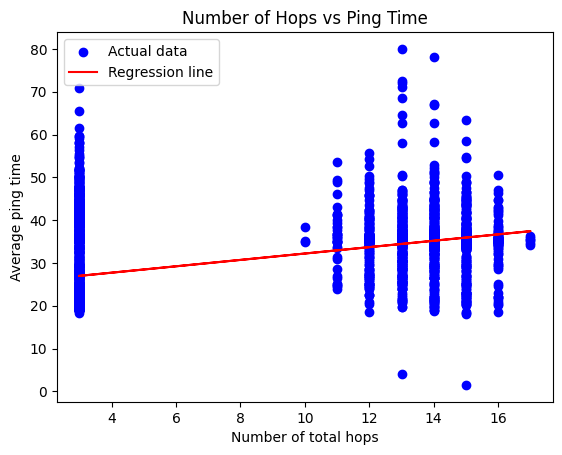

In [14]:
plt.scatter(main_df['NUM_HOPS'], main_df['avg'], color='blue', label='Actual data')
predicted = model.predict(avg_df['NUM_HOPS'])
plt.plot(avg_df['NUM_HOPS'], predicted, color='red', label='Regression line')
plt.xlabel('Number of total hops')
plt.ylabel('Average ping time')
plt.title('Number of Hops vs Ping Time')
plt.legend()
plt.show()

In [15]:
avg_df2 = main_df[['NUM_HOPS', 'avg_without_first']]
model = smf.ols(formula='avg_without_first ~ NUM_HOPS', 
                data=avg_df2).fit() 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:      avg_without_first   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     847.5
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.58e-166
Time:                        07:58:16   Log-Likelihood:                -13370.
No. Observations:                3398   AIC:                         2.674e+04
Df Residuals:                    3396   BIC:                         2.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4858      0.387     65.891      0.0

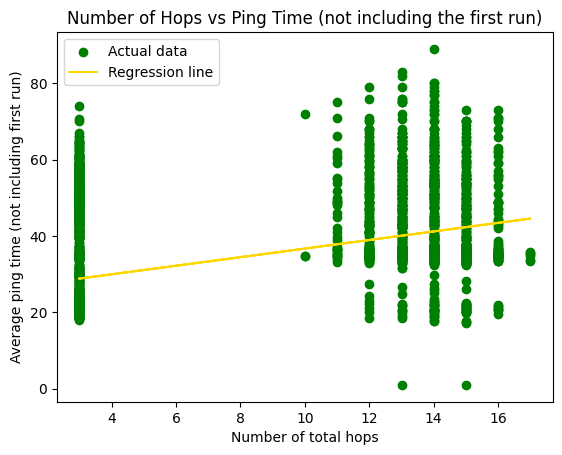

In [16]:
plt.scatter(main_df['NUM_HOPS'], main_df['avg_without_first'], color='green', label='Actual data')
predicted = model.predict(avg_df['NUM_HOPS'])
plt.plot(avg_df2['NUM_HOPS'], predicted, color='gold', label='Regression line')
plt.xlabel('Number of total hops')
plt.ylabel('Average ping time (not including first run)')
plt.title('Number of Hops vs Ping Time (not including the first run)')
plt.legend()
plt.show()

# breaking up data by source-destination pairs

In [5]:
main_df = pd.read_csv('saved.csv')
main_df

,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5,avg,avg_without_first
0,enx0016083656d3,128.2.208.222,2024-03-22 12:54:36.317797,3,19.0,22.0,21.0,19.0,22.0,20.6,21.00
1,eth1,128.2.208.222,2024-03-22 12:55:29.891682,13,37.0,37.0,33.0,37.0,38.0,36.4,36.25
2,enx0016083656d3,128.2.208.222,2024-03-22 12:56:36.061612,3,58.0,56.0,54.0,53.0,53.0,54.8,54.00
3,eth1,128.2.208.222,2024-03-22 12:57:29.101690,12,34.0,42.0,42.0,43.0,38.0,39.8,41.25
4,enx0016083656d3,128.2.208.222,2024-03-22 13:23:34.224165,3,27.0,20.0,20.0,21.0,19.0,21.4,20.00
...,...,...,...,...,...,...,...,...,...,...,...
3393,enx0016083656d3,128.2.208.222,2024-04-09 07:40:41.149799,3,18.0,19.0,24.0,22.0,22.0,21.0,21.75
3394,enx0050b623c78d,128.2.208.222,2024-04-09 07:53:18.104457,12,8.0,39.0,57.0,55.0,59.0,43.6,52.50
3395,enx0016083656d3,128.2.208.222,2024-04-09 07:57:35.837278,3,19.0,22.0,18.0,24.0,22.0,21.0,21.50
3396,enx0050b623c78d,128.2.208.222,2024-04-09 08:10:30.412119,14,6.0,62.0,NaN,NaN,NaN,34.0,62.00


In [4]:
main_df['Source2'] = main_df['SRC'] == 'enx0016083656d3'
main_df['Source1'] = (main_df['SRC'] == 'eth1') | (main_df['SRC'] == 'enx0050b623c78d')
main_df['Destination2'] = main_df['DEST'] == '52.70.44.155'
main_df['Destination1'] = main_df['DEST'] == '128.2.208.222'
main_df
main_df['S1D1'] = main_df['Source1'] & main_df['Destination1']
main_df['S1D2'] = main_df['Source1'] & main_df['Destination2']
main_df['S2D1'] = main_df['Source2'] & main_df['Destination1']
main_df['S2D2'] = main_df['Source2'] & main_df['Destination2']
s1d1df = main_df[main_df['S1D1'] == True]
s1d2df = main_df[main_df['S1D2'] == True]
s2d1df = main_df[main_df['S2D1'] == True]
s2d2df = main_df[main_df['S2D2'] == True]
s1d1df.reset_index(drop=True, inplace=True)
s1d2df.reset_index(drop=True, inplace=True)
s2d1df.reset_index(drop=True, inplace=True)
s2d2df.reset_index(drop=True, inplace=True)
s1d2df

,SRC,DEST,TIMESTAMP,NUM_HOPS,PING1,PING2,PING3,PING4,PING5,avg,avg_without_first,Source2,Source1,Destination2,Destination1,S1D1,S1D2,S2D1,S2D2


In [18]:
s1d1df.to_csv('s1d1df.csv', index=False)  # Set index=False if you don't want to save the row indices
s1d2df.to_csv('s1d2df.csv', index=False)  # Set index=False if you don't want to save the row indices